In [84]:
import pandas as pd

In [85]:
original_formula = pd.read_parquet('combined_415_original_formula.pq')
quenched_formula = pd.read_parquet('combined_415_quenched_formula.pq')
original_molecule = pd.read_parquet('combined_415_original_molecule.pq')
quenched_molecule = pd.read_parquet('combined_415_quenched_molecule.pq')

In [86]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.dpi"] = 200
purple = "#967BB6"

In [87]:
original_molecule['time'] = original_molecule['frame']/8000*0.1
original_formula['time'] = original_formula['frame']/8000*0.1
quenched_molecule['time'] = quenched_molecule['frame']/8000*0.1
quenched_formula['time'] = quenched_formula['frame']/8000*0.1


In [88]:
print(original_molecule)
print(len(original_molecule['frame'].unique()))

       frame  formula flatten_formula       smiles     name  \
0     224713  C3H7NO2   CCCHHHHHHHNOO  CC(C(=O)O)N  Alanine   
1     224713  C3H7NO2   CCCHHHHHHHNOO  CC(C(=O)O)N  Alanine   
2     224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
3     224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
4     224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
...      ...      ...             ...          ...      ...   
7291  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
7292  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
7293  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
7294  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
7295  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   

                                           atom_indices      time  
0     [353544, 1145124, 4559774, 5346574, 6559748, 8...  2.808912  
1     [3091795, 4883584, 6693908, 9467811, 9511606, ...  2.808912  
2     [624761, 1620658, 1925826, 364259

In [89]:
print(quenched_molecule)
print(len(quenched_molecule['frame'].unique()))

        frame  formula flatten_formula       smiles     name  \
0      224713  C3H7NO2   CCCHHHHHHHNOO  CC(C(=O)O)N  Alanine   
1      224713  C3H7NO2   CCCHHHHHHHNOO  CC(C(=O)O)N  Alanine   
2      224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
3      224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
4      224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
...       ...      ...             ...          ...      ...   
12425  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
12426  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
12427  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
12428  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
12429  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   

                                            atom_indices      time  
0      [431696, 2972081, 3725516, 5842740, 6476561, 6...  2.808912  
1      [353544, 1145124, 4559774, 5346574, 6559748, 8...  2.808912  
2      [856989, 4601145,

In [90]:
quenched_molecule['name'].unique()

array(['Alanine', 'Glycine', 'Aspartic Acid', 'Serine', 'Cytosine',
       'Valine', 'Leucine', 'Asparagine', 'Uracil', 'Threonine',
       'Thymine'], dtype=object)

In [91]:
original_frames = set(original_molecule['frame'].unique())
quenched_frames = set(quenched_molecule['frame'].unique())

missing_frames = original_frames - quenched_frames

filtered_original_molecule = original_molecule[~original_molecule['frame'].isin(missing_frames)]

print(f"Missing frames: {missing_frames}")
print(f"Number of rows after dropping missing frames: {len(filtered_original_molecule)}")


Missing frames: {np.int64(268953), np.int64(283380), np.int64(165724)}
Number of rows after dropping missing frames: 7235


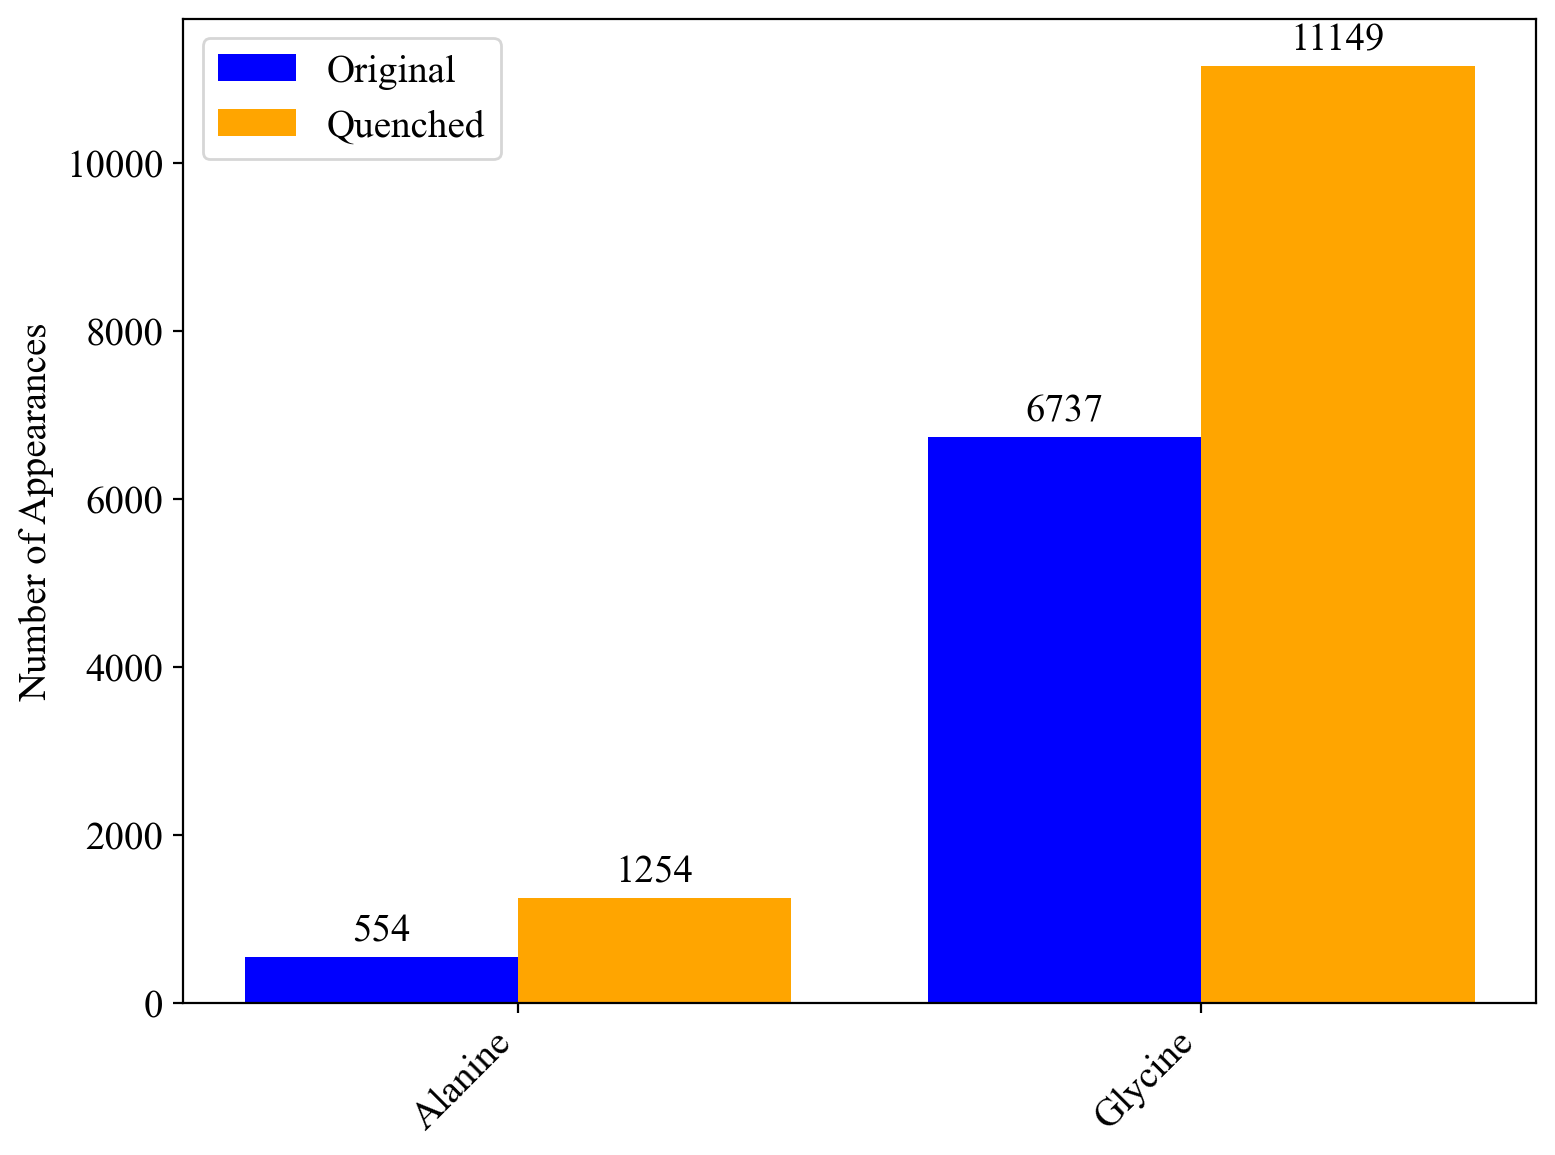

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

counts_original = original_molecule.groupby('name').size()
counts_quenched = quenched_molecule.groupby('name').size()

# Align both series (counts_original, counts_quenched) to ensure both have the same index
counts_combined = pd.DataFrame({
    'Original': counts_original,
    'Quenched': counts_quenched
}).fillna(0)  # Fill missing values with 0 in case some molecules are only in one of the datasets

counts_combined = counts_combined[counts_combined.sum(axis=1) >= 50]


molecules = counts_combined.index
counts_original = counts_combined['Original']
counts_quenched = counts_combined['Quenched']

x = np.arange(len(molecules))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - bar_width/2, counts_original, bar_width, label='Original', color='blue')
bars2 = ax.bar(x + bar_width/2, counts_quenched, bar_width, label='Quenched', color='orange')

ax.set_ylabel('Number of Appearances')
ax.set_xticks(x)
ax.set_xticklabels(molecules, rotation=45, ha="right")
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',  # Convert height to integer for cleaner display
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.savefig('gly-ala-before_after_quench.png')
plt.show()


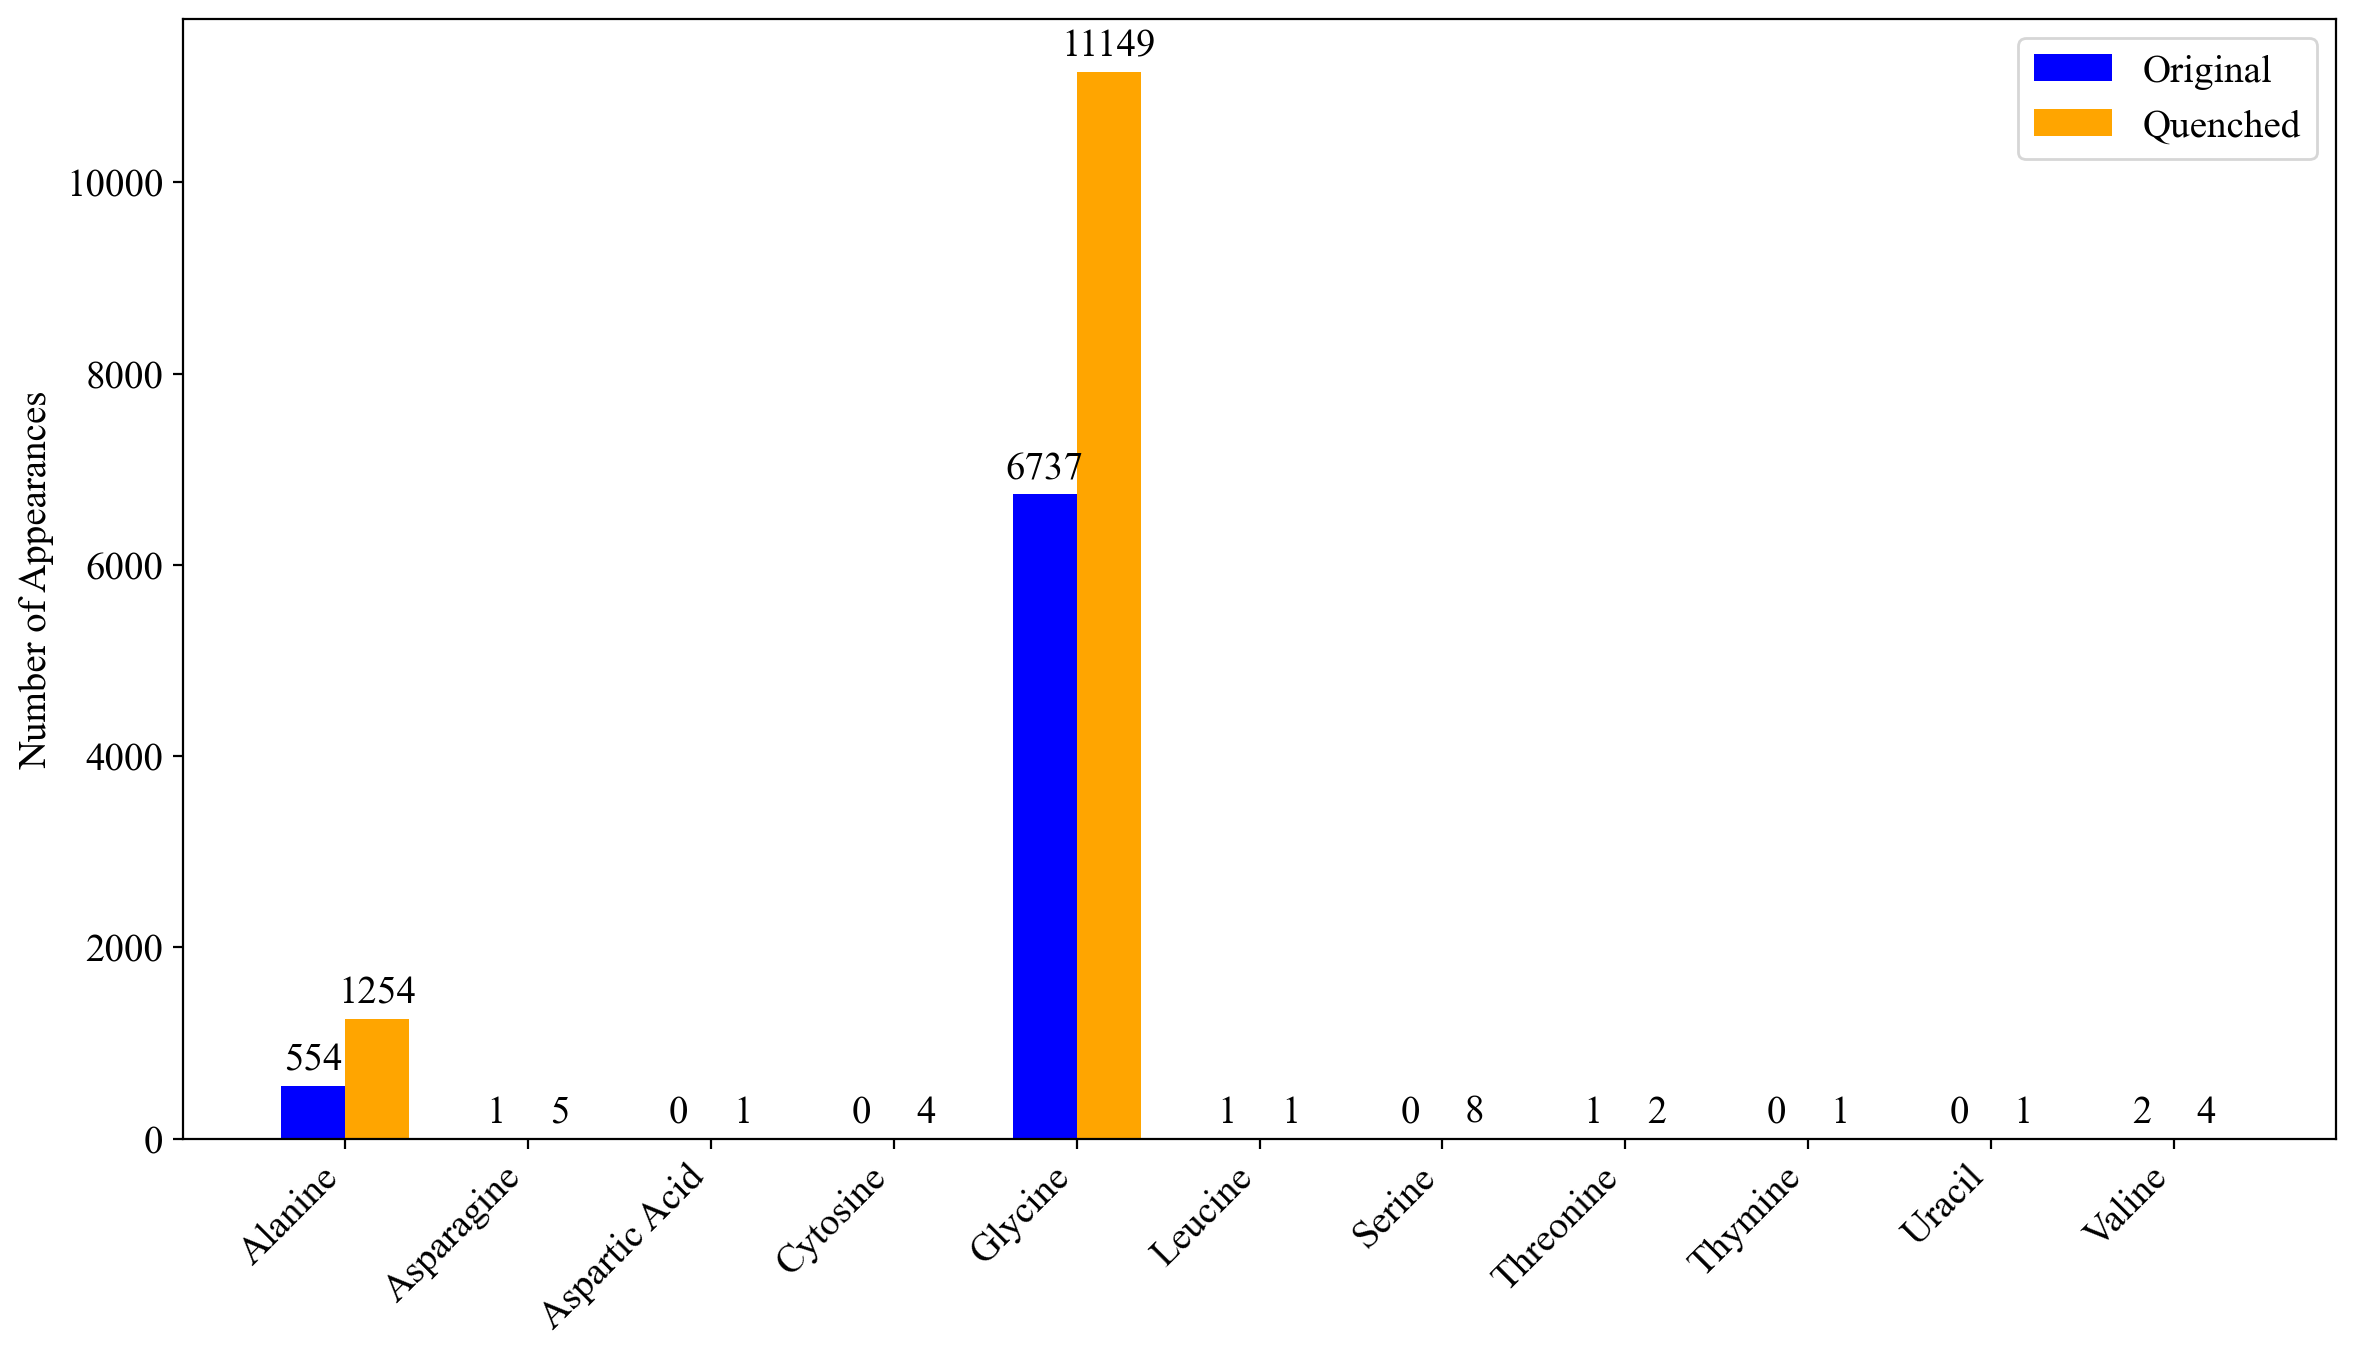

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

counts_original = original_molecule.groupby('name').size()
counts_quenched = quenched_molecule.groupby('name').size()

# Align both series (counts_original, counts_quenched) to ensure both have the same index
counts_combined = pd.DataFrame({
    'Original': counts_original,
    'Quenched': counts_quenched
}).fillna(0)  # Fill missing values with 0 in case some molecules are only in one of the datasets

molecules = counts_combined.index
counts_original = counts_combined['Original']
counts_quenched = counts_combined['Quenched']

x = np.arange(len(molecules))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - bar_width/2, counts_original, bar_width, label='Original', color='blue')
bars2 = ax.bar(x + bar_width/2, counts_quenched, bar_width, label='Quenched', color='orange')

ax.set_ylabel('Number of Appearances')
ax.set_xticks(x)
ax.set_xticklabels(molecules, rotation=45, ha="right")
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',  # Convert height to integer for cleaner display
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.savefig('mol_before-after_quench.png')
plt.show()


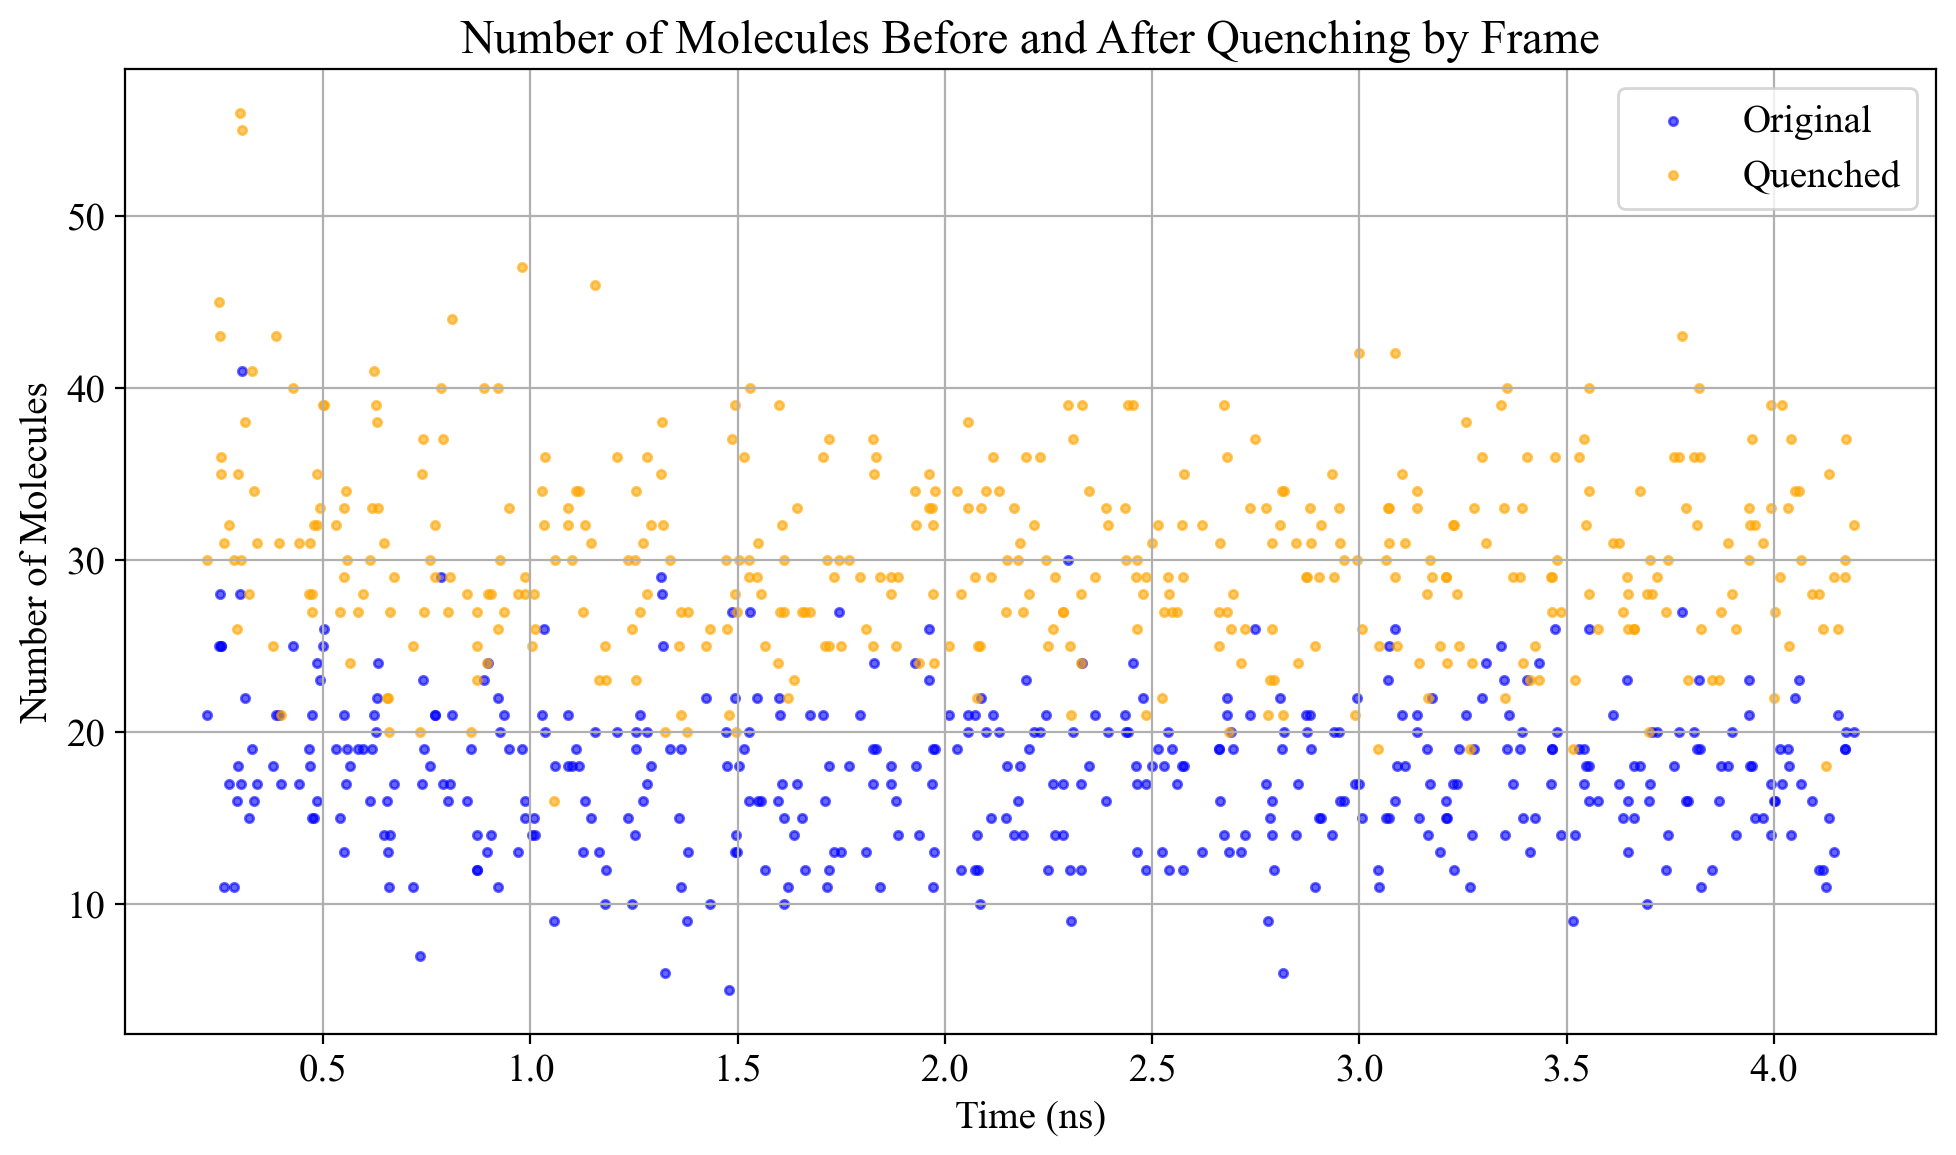

In [93]:
import matplotlib.pyplot as plt

original_frame_counts = original_molecule.groupby('time').size()
quenched_frame_counts = quenched_molecule.groupby('time').size()

plt.figure(figsize=(10, 6))

plt.scatter(original_frame_counts.index, original_frame_counts.values, color='blue', label='Original', alpha=0.6, marker='.')
plt.scatter(quenched_frame_counts.index, quenched_frame_counts.values, color='orange', label='Quenched', alpha=0.6, marker='.')

plt.xlabel('Time (ns)')
plt.ylabel('Number of Molecules')
plt.title('Number of Molecules Before and After Quenching by Frame')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


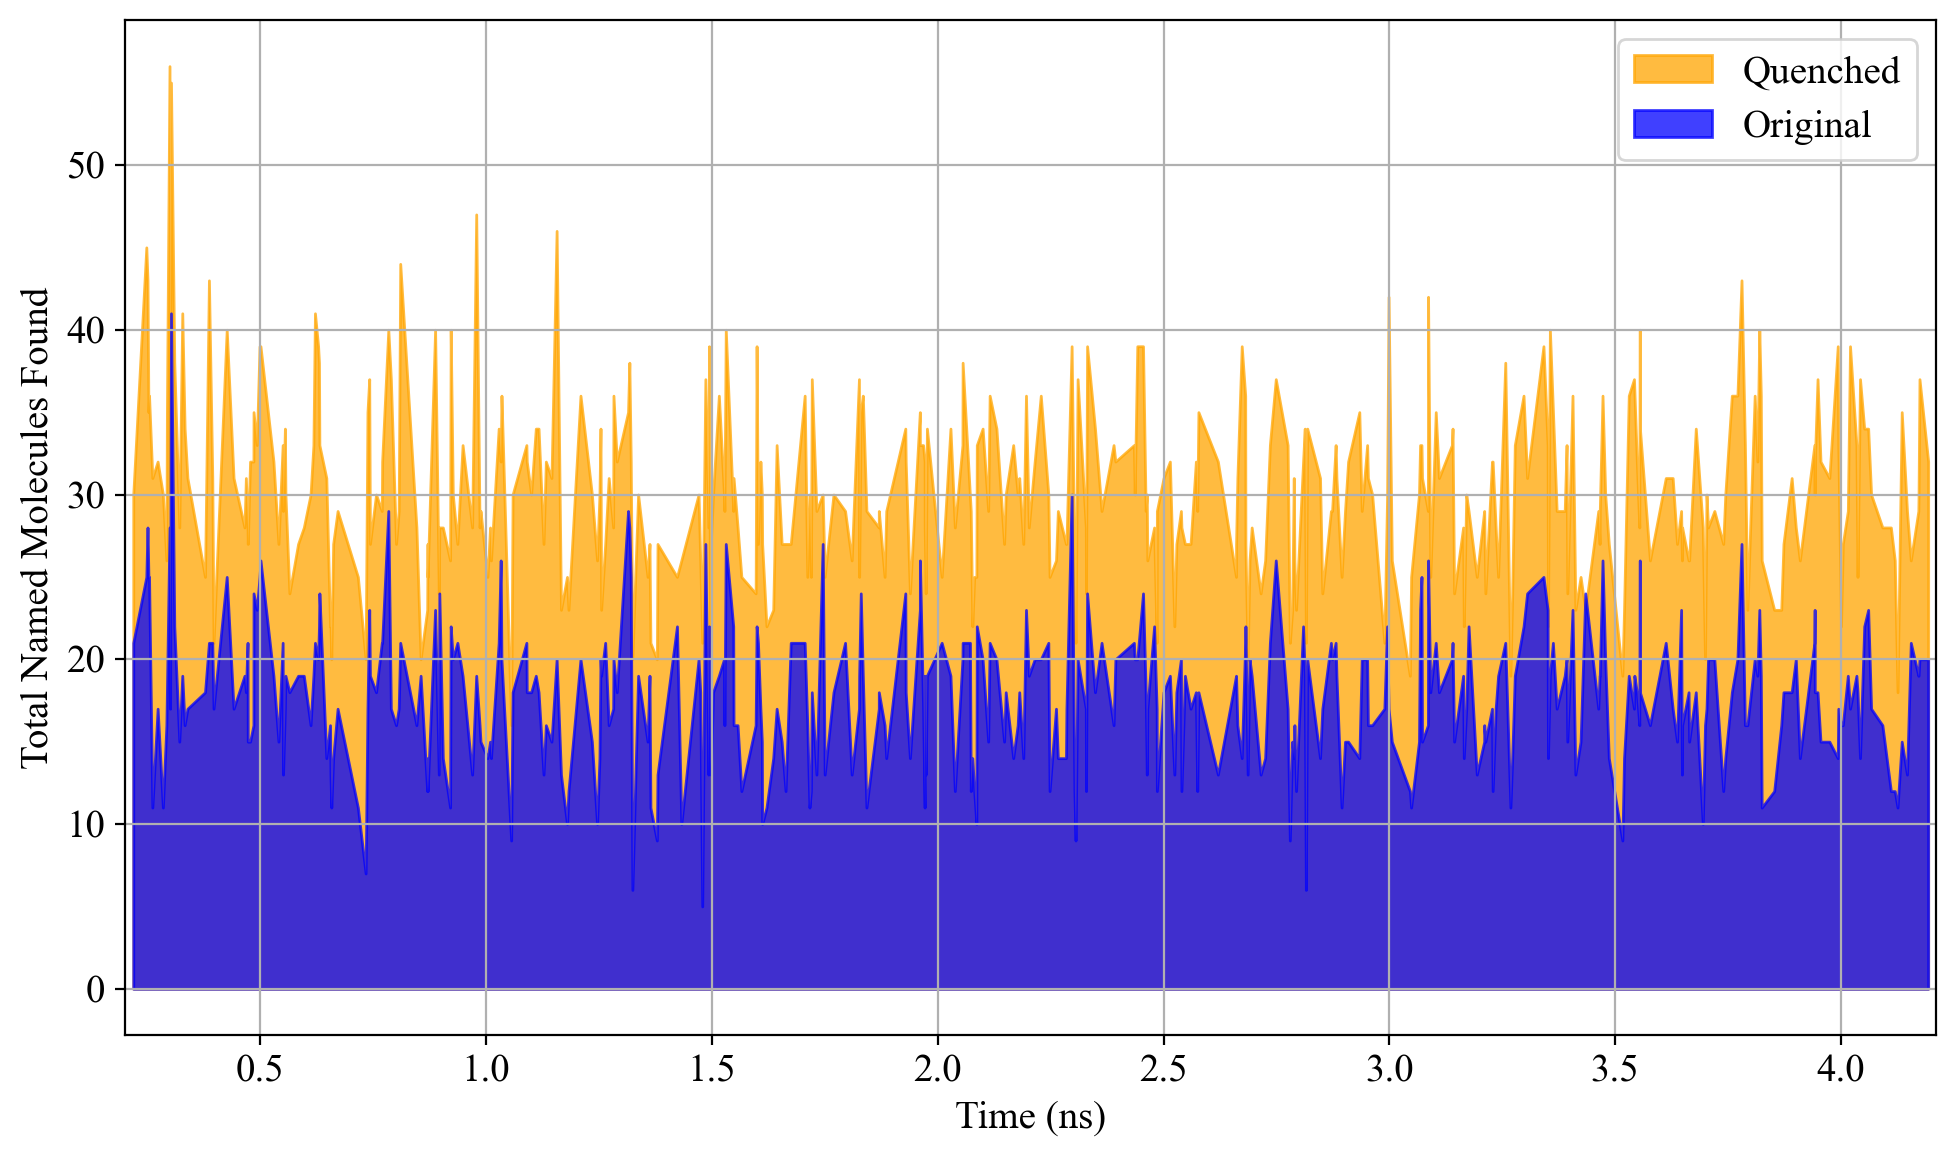

In [94]:
plt.figure(figsize=(10, 6))

plt.fill_between(quenched_frame_counts.index, quenched_frame_counts.values, color='orange', alpha=0.75, label='Quenched')
plt.fill_between(original_frame_counts.index, original_frame_counts.values, color='blue', alpha=0.75, label='Original')

plt.xlabel('Time (ns)')
plt.ylabel('Total Named Molecules Found')
plt.xlim(0.2,4.21)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('named_mols_before-after_quench.png')
plt.show()


/var/folders/gg/d8ll1f157js5d4n67jyq89jr0000gn/T/ipykernel_1325/1102740093.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_combined, x='Condition', y='Counts',


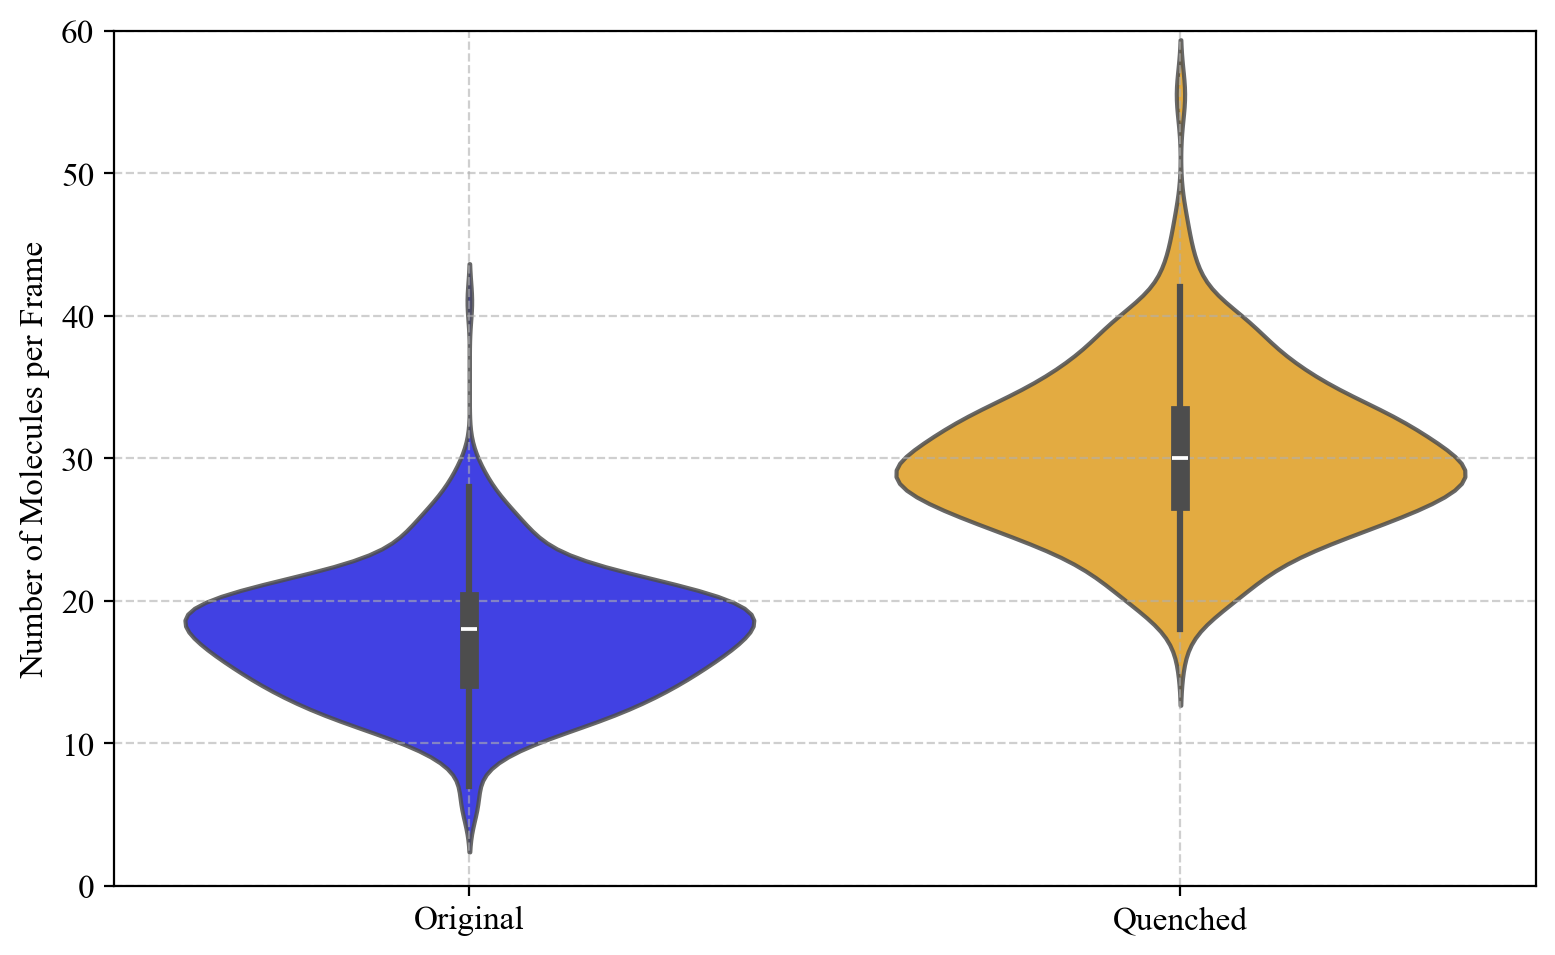

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine data into a single DataFrame
df_original = pd.DataFrame({'Counts': original_frame_counts.values, 'Condition': 'Original'})
df_quenched = pd.DataFrame({'Counts': quenched_frame_counts.values, 'Condition': 'Quenched'})

df_combined = pd.concat([df_original, df_quenched])

# Create figure
plt.figure(figsize=(8, 5))

# Violin plot
sns.violinplot(data=df_combined, x='Condition', y='Counts', 
               inner='box',  # Show quartiles inside the violin
               linewidth=1.5,  # Make the violin borders thicker
               palette={'Original': 'blue', 'Quenched': 'orange'}, alpha=0.85)  # Blue for Original, Orange for Quenched

# Title and labels
plt.xlabel(None, fontsize=12)
plt.ylabel('Number of Molecules per Frame', fontsize=12)
plt.ylim(0,60)
# Adjust tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.savefig('updated_violins.png')
plt.show()

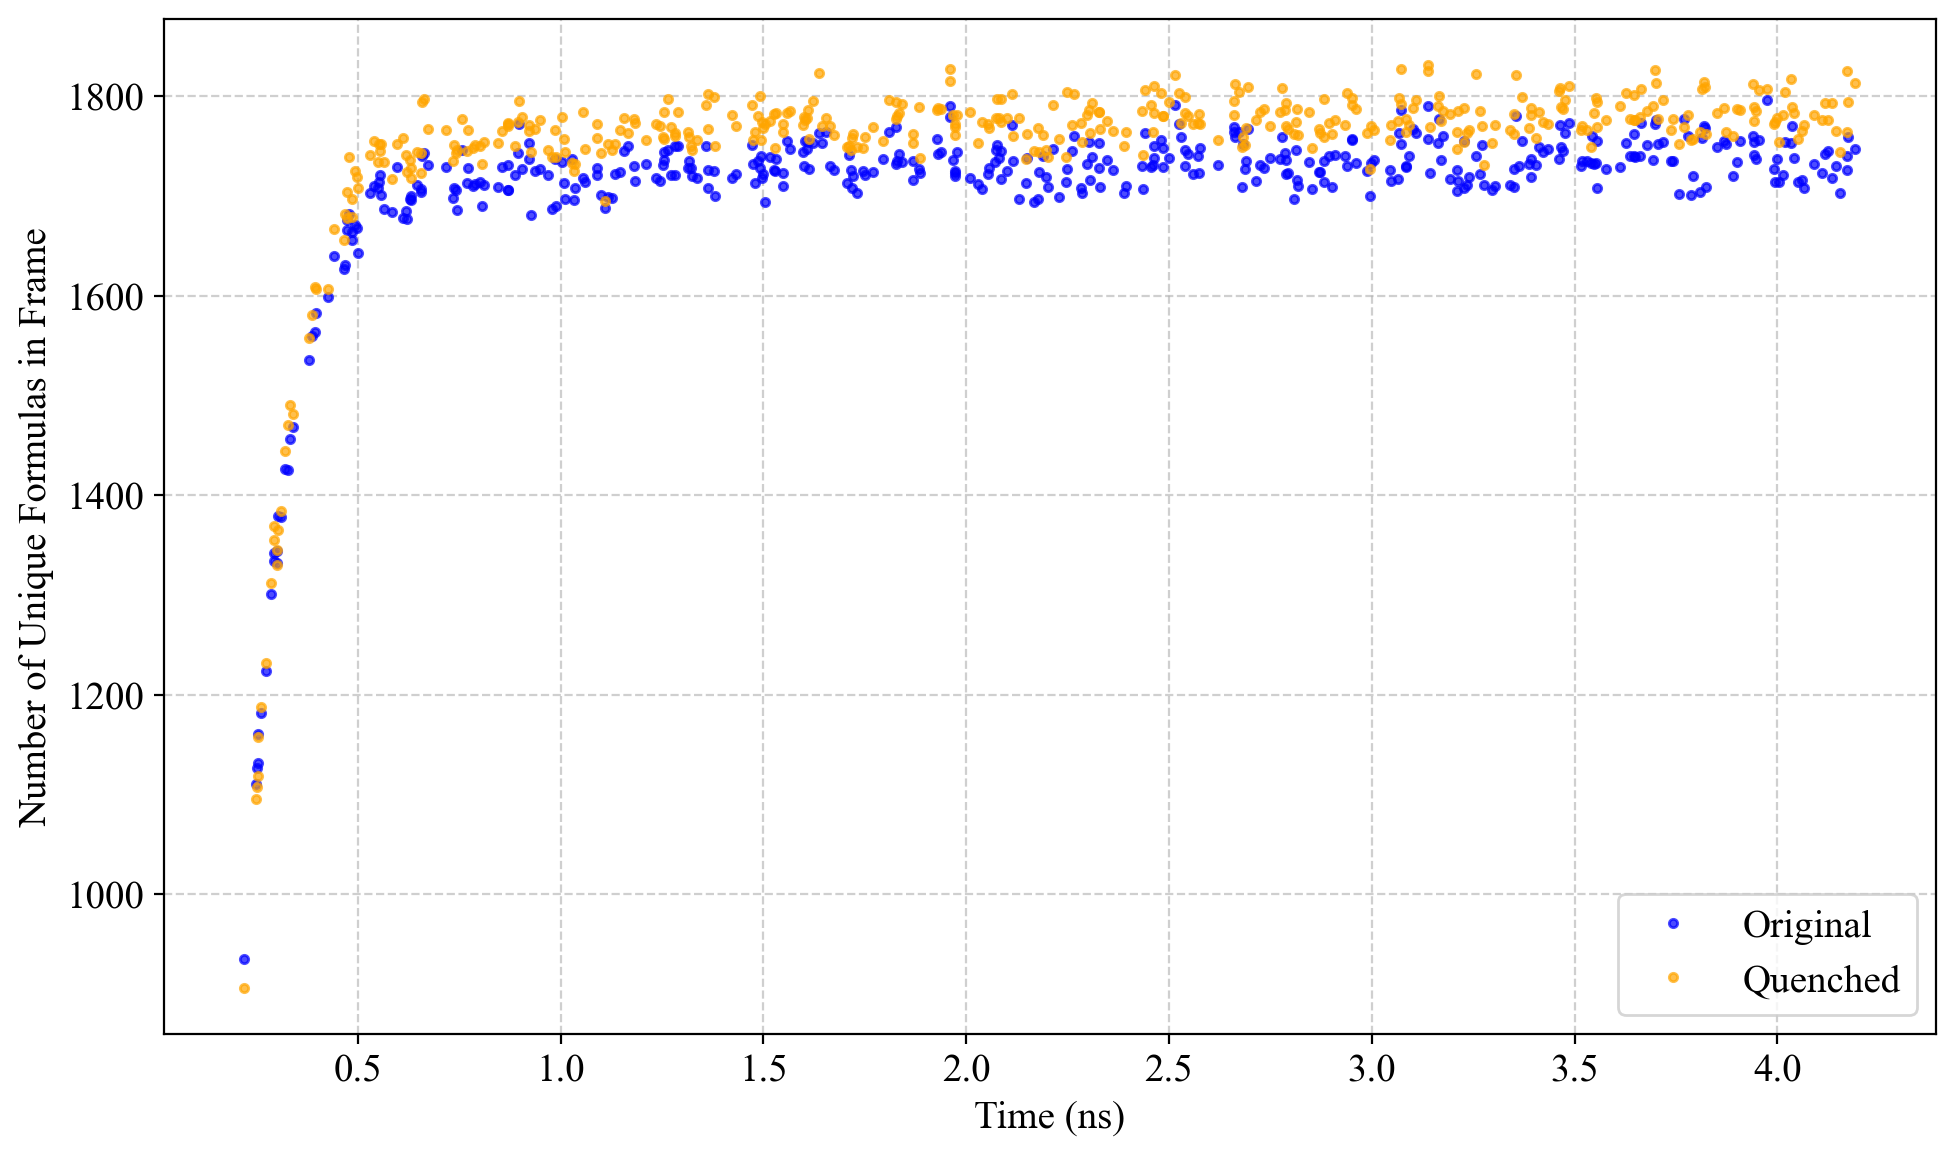

In [96]:
# Count the number of unique formulas per frame in both datasets
quench_formula_counts = quenched_formula.groupby('time').size()
original_formula_counts = original_formula.groupby('time').size()

plt.figure(figsize=(10, 6))

# Plot original formula counts in blue
plt.plot(original_formula_counts.index, original_formula_counts.values, 
         label="Original", marker='.', linestyle='', color='blue', alpha=0.7)

# Plot quenched formula counts in orange
plt.plot(quench_formula_counts.index, quench_formula_counts.values, 
         label="Quenched", marker='.', linestyle='', color='orange', alpha=0.7)

# Labels and title
plt.xlabel("Time (ns)")
plt.ylabel("Number of Unique Formulas in Frame")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig('quench_formula_vs_frame.png')
plt.show()

/var/folders/gg/d8ll1f157js5d4n67jyq89jr0000gn/T/ipykernel_32472/3868603169.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_combined, x='Condition', y='Counts',


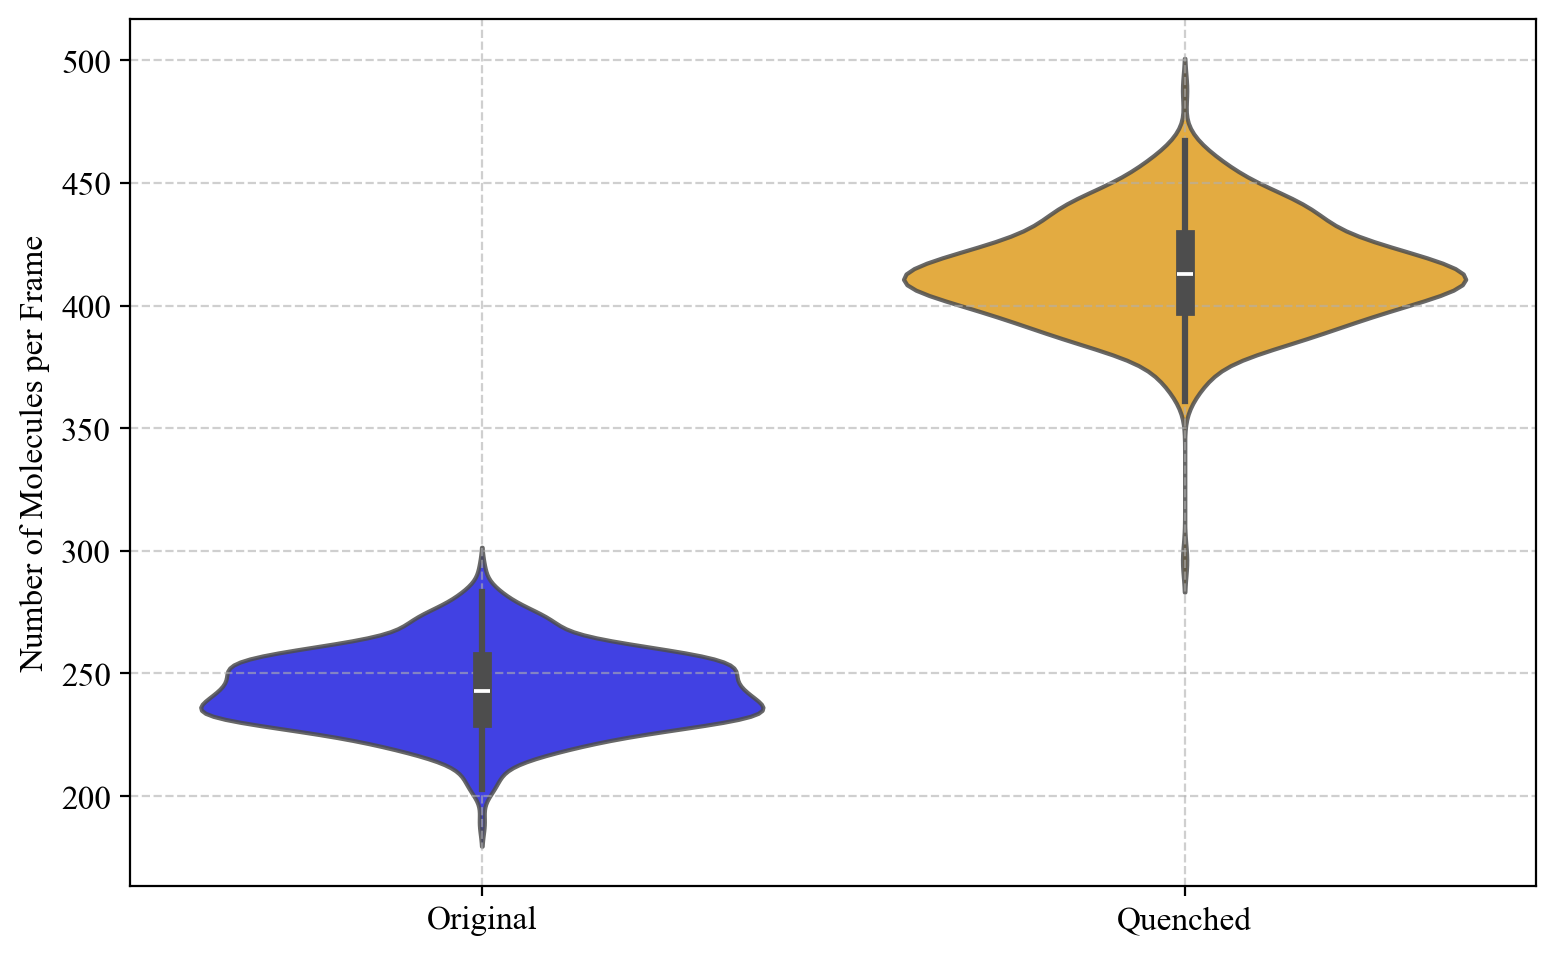

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

new_quenched = pd.read_parquet('../new_415_concatenated/combined_415_quenched_molecule.pq')
new_original = pd.read_parquet('../new_415_concatenated/combined_415_original_molecule.pq')

new_original['time'] = new_original['frame']/8000*0.1
new_quenched['time'] = new_quenched['frame']/8000*0.1

original_frame_counts = new_original.groupby('time').size()
quenched_frame_counts = new_quenched.groupby('time').size()

# Combine data into a single DataFrame
df_original = pd.DataFrame({'Counts': original_frame_counts.values, 'Condition': 'Original'})
df_quenched = pd.DataFrame({'Counts': quenched_frame_counts.values, 'Condition': 'Quenched'})

df_combined = pd.concat([df_original, df_quenched])

# Create figure
plt.figure(figsize=(8, 5))

# Violin plot
sns.violinplot(data=df_combined, x='Condition', y='Counts', 
               inner='box',  # Show quartiles inside the violin
               linewidth=1.5,  # Make the violin borders thicker
               palette={'Original': 'blue', 'Quenched': 'orange'}, alpha=0.85)  # Blue for Original, Orange for Quenched

# Title and labels
plt.xlabel(None, fontsize=12)
plt.ylabel('Number of Molecules per Frame', fontsize=12)
# Adjust tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.savefig('new_415_violins.png')
plt.show()

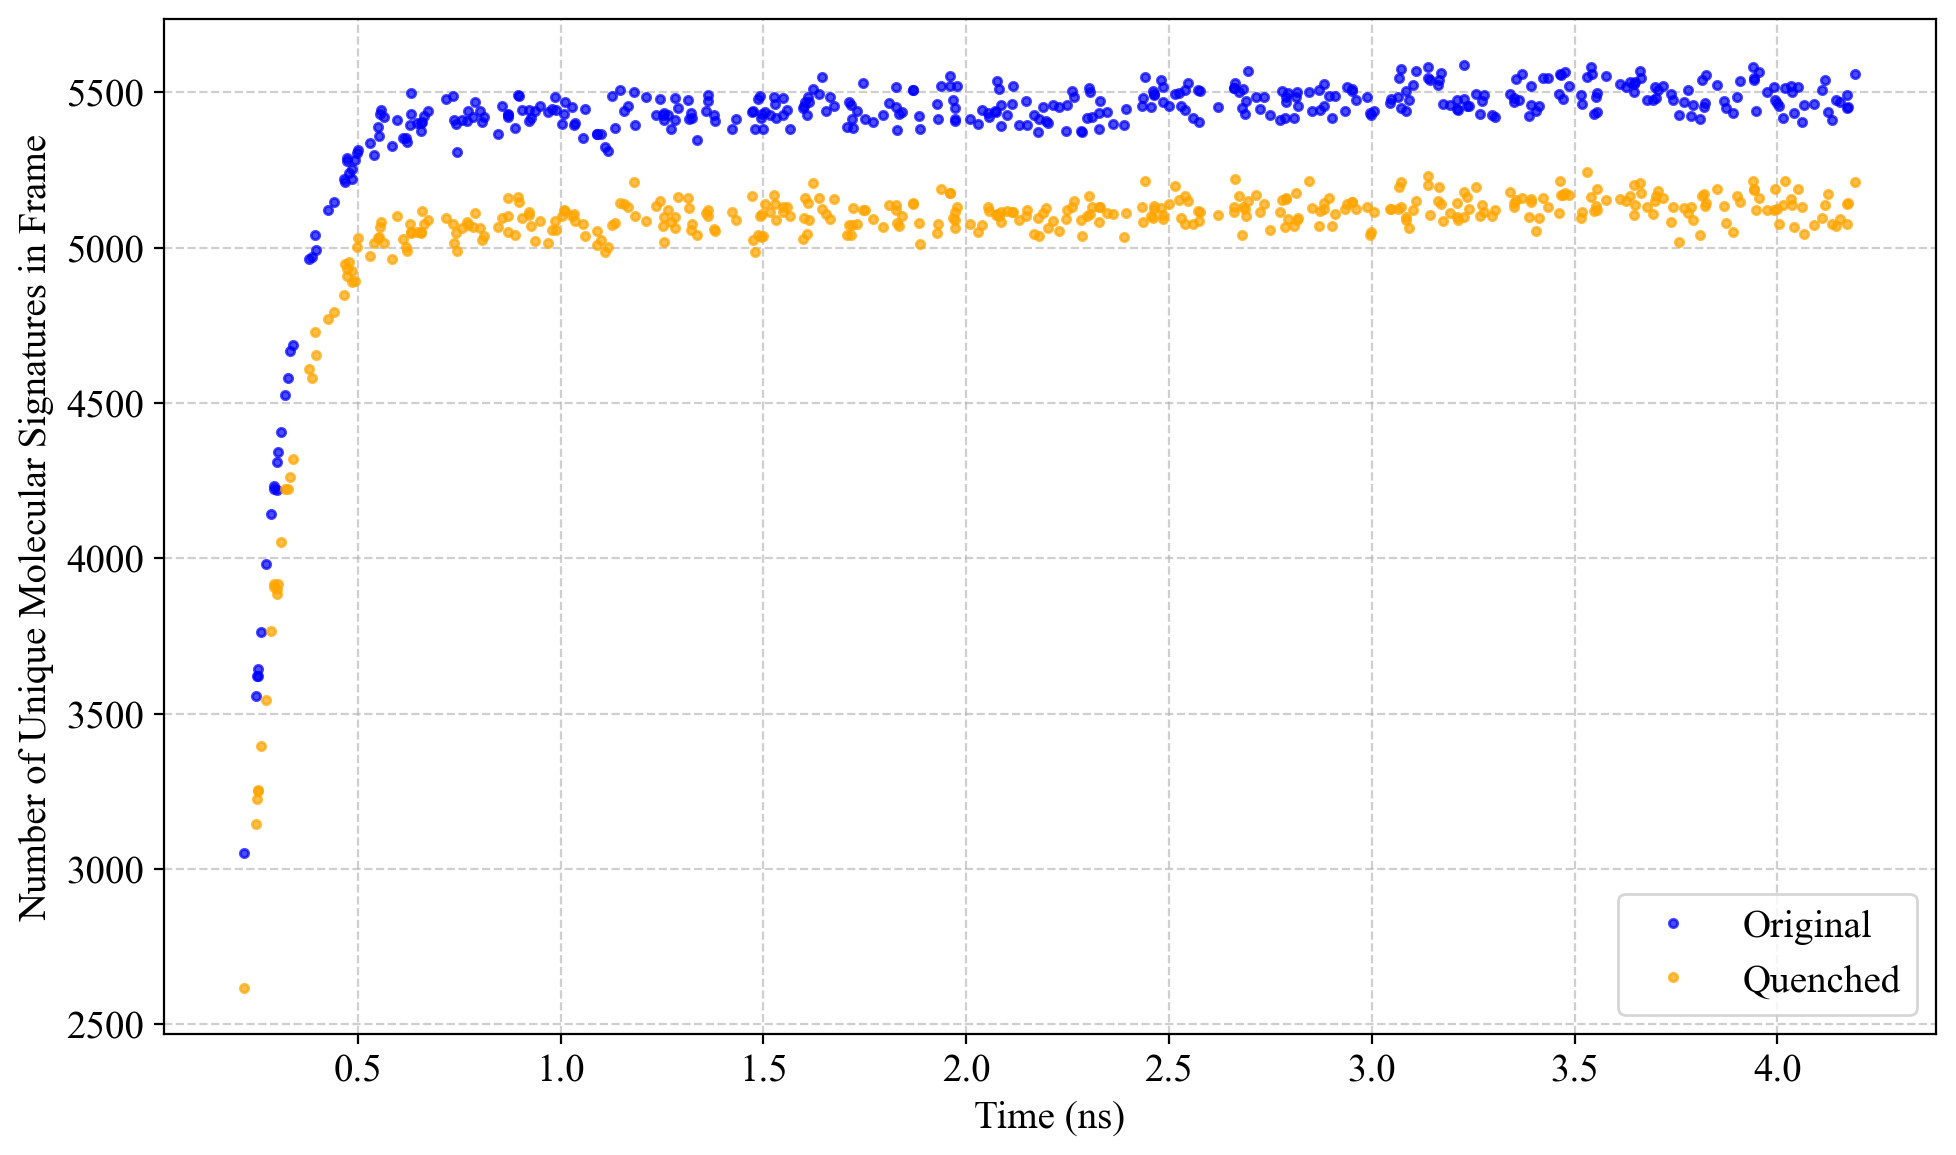

In [17]:
new_quenched = pd.read_parquet('../new_415_concatenated/combined_415_quenched_formula.pq')
new_original = pd.read_parquet('../new_415_concatenated/combined_415_original_formula.pq')

new_original['time'] = new_original['frame']/8000*0.1
new_quenched['time'] = new_quenched['frame']/8000*0.1

quench_formula_counts = new_quenched.groupby('time').size()
original_formula_counts = new_original.groupby('time').size()

plt.figure(figsize=(10, 6))

# Plot original formula counts in blue
plt.plot(original_formula_counts.index, original_formula_counts.values, 
         label="Original", marker='.', linestyle='', color='blue', alpha=0.7)

# Plot quenched formula counts in orange
plt.plot(quench_formula_counts.index, quench_formula_counts.values, 
         label="Quenched", marker='.', linestyle='', color='orange', alpha=0.7)

# Labels and title
plt.xlabel("Time (ns)")
plt.ylabel("Number of Unique Molecular Signatures in Frame")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig('new_415_quench_formula_vs_frame.png')
plt.show()

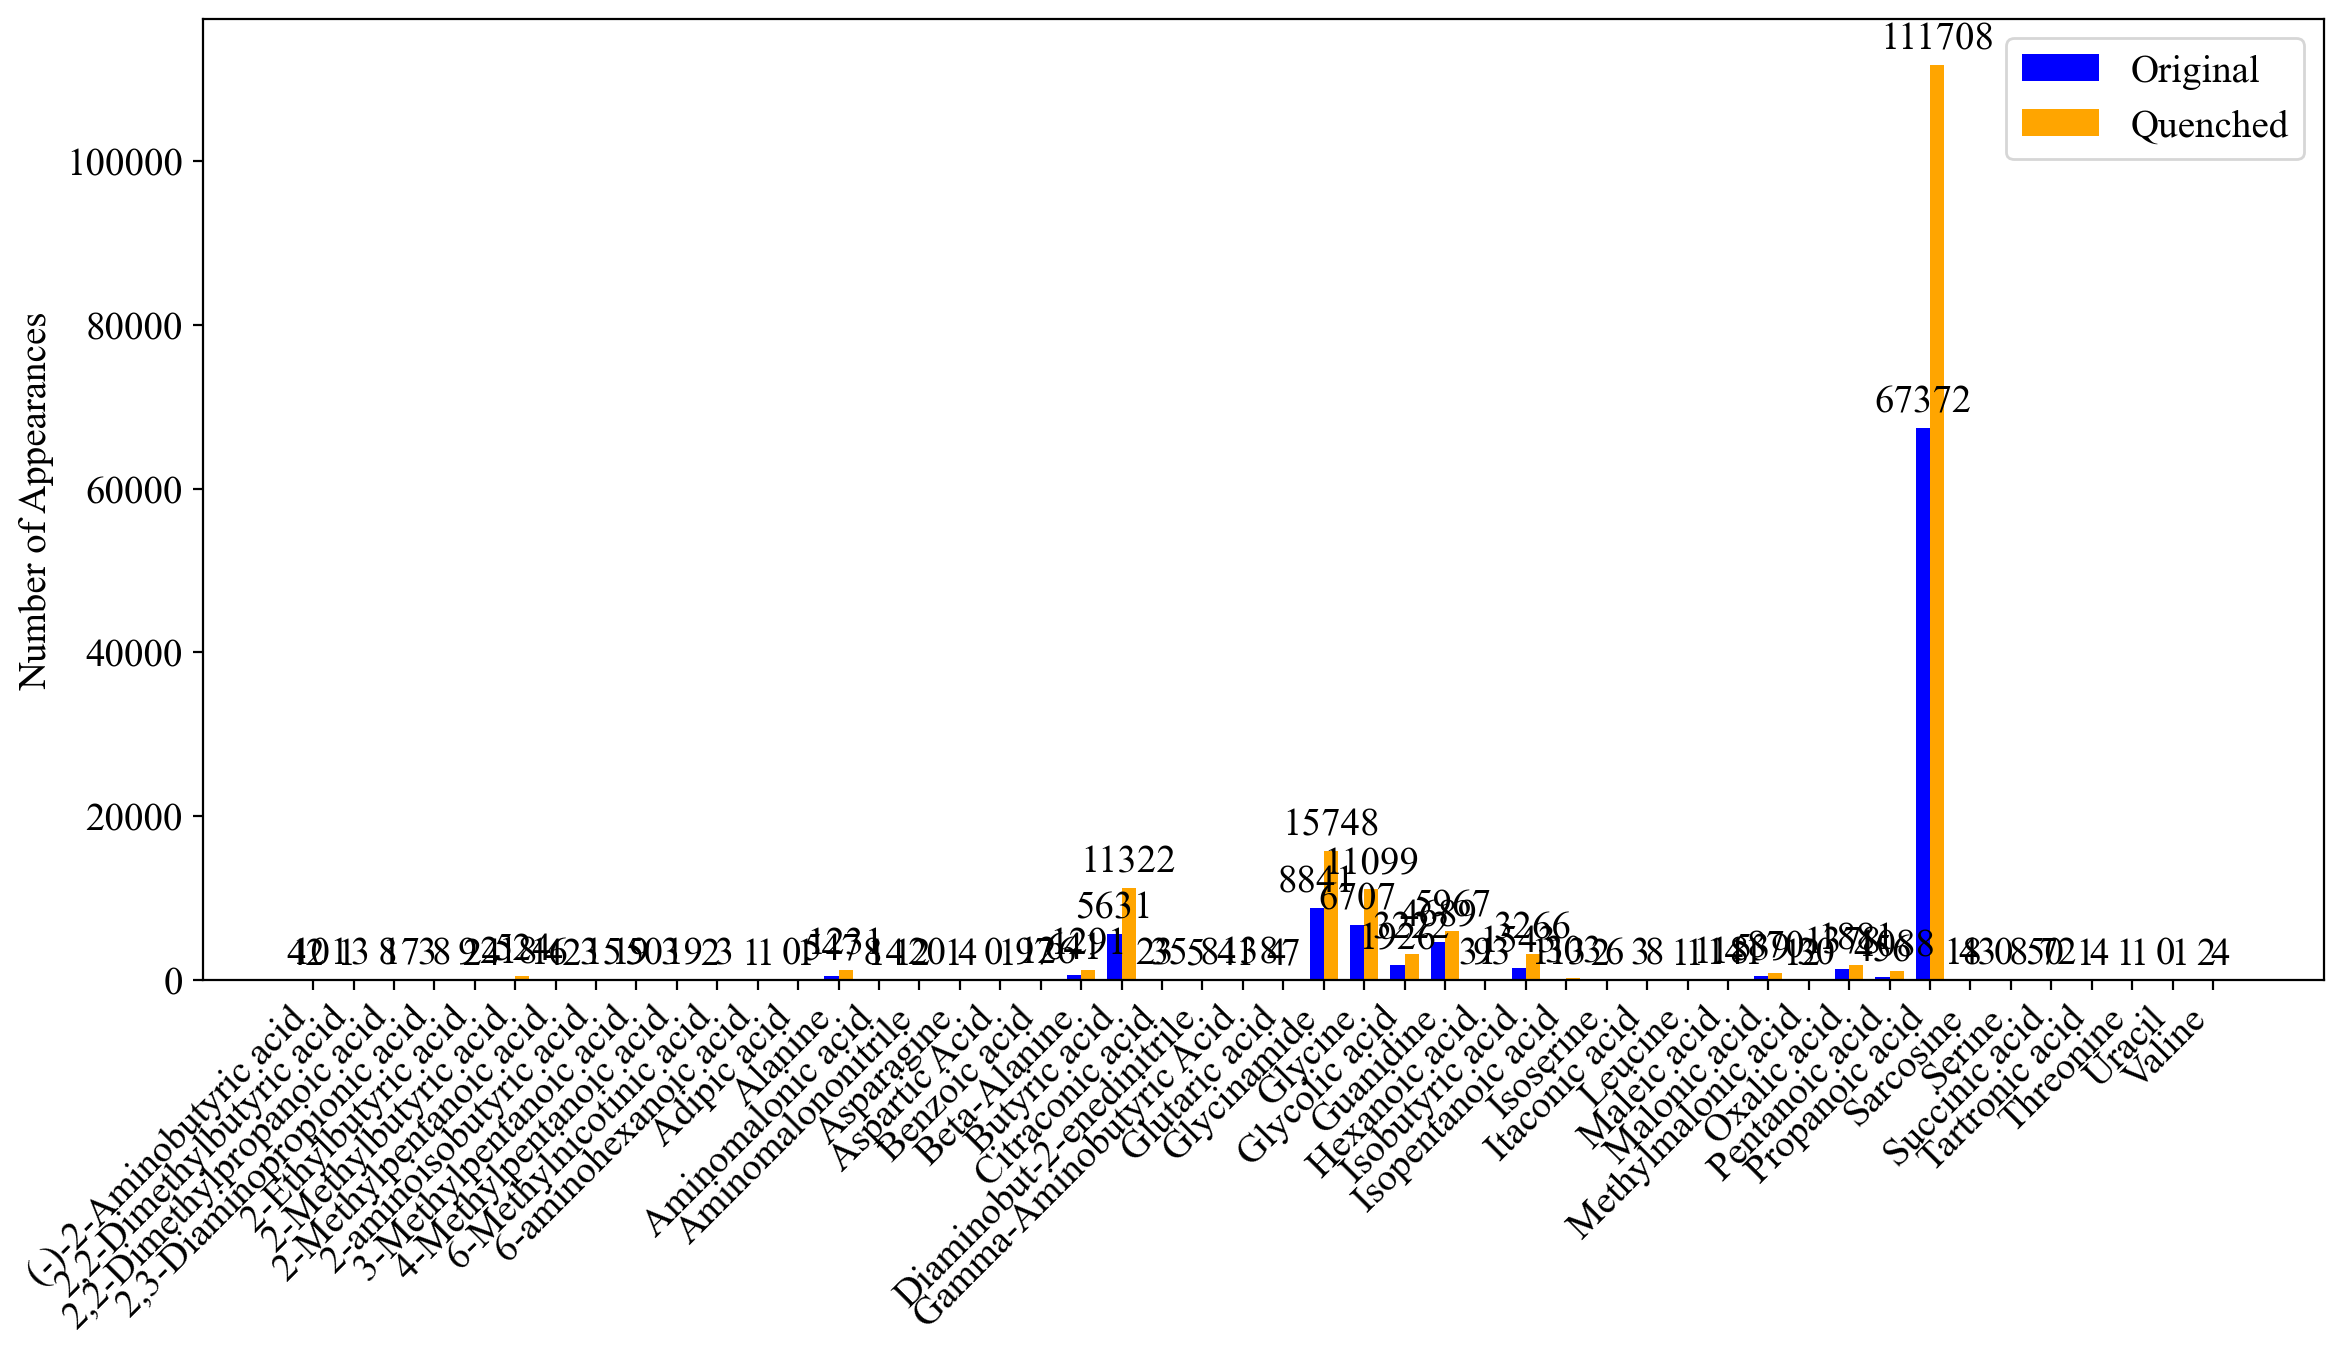

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

counts_original = new_original.groupby('name').size()
counts_quenched = new_quenched.groupby('name').size()

# Align both series (counts_original, counts_quenched) to ensure both have the same index
counts_combined = pd.DataFrame({
    'Original': counts_original,
    'Quenched': counts_quenched
}).fillna(0)  # Fill missing values with 0 in case some molecules are only in one of the datasets

#counts_combined = counts_combined[counts_combined.sum(axis=1) >= 5000]

molecules = counts_combined.index
counts_original = counts_combined['Original']
counts_quenched = counts_combined['Quenched']

x = np.arange(len(molecules))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - bar_width/2, counts_original, bar_width, label='Original', color='blue')
bars2 = ax.bar(x + bar_width/2, counts_quenched, bar_width, label='Quenched', color='orange')

ax.set_ylabel('Number of Appearances')
ax.set_xticks(x)
ax.set_xticklabels(molecules, rotation=45, ha="right")
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',  # Convert height to integer for cleaner display
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.savefig('new__mol_before-after_quench.png')
plt.show()
